In [30]:
import os
import csv
import lightkurve as lk
from lightkurve import search_targetpixelfile
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
import astropy.units as u
import sys, string, calendar, datetime, traceback



In [34]:
#path_to_csv_file = input('Please type path to csv file: \n')
f=open('/Users/AllieMcCarthy/Desktop/K2dataNew.csv')
csv_f=csv.reader(f)
header=next(csv_f)

In [35]:
#Need to create a list maybe to read from with all EPICs, maybe read from file? Prompt user?

J_mags_mdwarf=[]
JminusK_mags_mdwarf=[]
J_mags_ldwarf=[]
JminusK_mags_ldwarf=[]
J_mags_tdwarf=[]
JminusK_mags_tdwarf=[]
spec_types_original=[]
variable=[]
notvariable=[]


In [36]:
for row in csv_f:
  try:
     print(row)
     EPIC = int(row[0])
     ob_name = row[1]
     campaign_num = int(row[2])
     spec_type_original = str(row[5])
     spec_types_original.append(spec_type_original)
     J_mag = float(row[7])
     K_mag = float(row[9])
     J_mag_abs = float(row[12])
     if spec_type_original == 'M9' or spec_type_original == 'M8' or spec_type_original == 'M7' or spec_type_original == 'M6' or spec_type_original == 'M5' or spec_type_original == 'M4' or spec_type_original == 'M3' or spec_type_original == 'M2' or spec_type_original == 'M1' or spec_type_original == 'M0':
        J_mags_mdwarf.append(J_mag_abs)
        JminusK = (J_mag)-(K_mag)
        JminusK_mags_mdwarf.append(JminusK)
     elif spec_type_original == 'L9' or spec_type_original == 'L8' or spec_type_original == 'L7' or spec_type_original == 'L6' or spec_type_original == 'L5' or spec_type_original == 'L4' or spec_type_original == 'L3' or spec_type_original == 'L2' or spec_type_original == 'L1' or spec_type_original == 'L0':
        J_mags_ldwarf.append(J_mag_abs)
        JminusK = (J_mag)-(K_mag)
        JminusK_mags_ldwarf.append(JminusK)
     elif spec_type_original == 'T0':
        J_mags_tdwarf.append(J_mag_abs)
        JminusK = (J_mag)-(K_mag)
        JminusK_mags_tdwarf.append(JminusK)
     

  except:
     pass
     print ('i had a problem')

['212178513', 'SDSS0831+23', '5', '127.899756', '23.697451', 'M7', 'No', '13.729', '13.152', '12.805', '2.15E-02', '4.64E+01', '10.39603483']
['212178513', 'SDSS0831+23', '18', '127.899756', '23.697451', 'M7', 'No', '13.729', '13.152', '12.805', '2.15E-02', '4.64E+01', '10.39603483']
['211332457', '2M0835+10', '5', '128.848607', '10.492178', 'M8', 'Yes', '13.137', '12.49', '12.045', '3.69E-02', '2.71E+01', '10.97179049']
['211332457', '2M0835+10', '18', '128.848607', '10.492178', 'M8', 'Yes', '13.137', '12.49', '12.045', '3.69E-02', '2.71E+01', '10.97179049']
['211329075', '2M0831+10', '5', '127.983268', '10.428261', 'M9', 'No', '13.621', '12.963', '12.45', '3.16E-02', '3.17E+01', '11.1168845']
['211329075', '2M0831+10', '18', '127.983268', '10.428261', 'M9', 'No', '13.621', '12.963', '12.45', '3.16E-02', '3.17E+01', '11.1168845']
['211962038', '2M0826+19', '5', '126.677623', '19.656242', 'M9', 'Yes', '14.777', '14.009', '13.581', '2.37E-02', '4.21E+01', '11.6536351']
['211962038', '2M

In [37]:
#path_to_csv_file = input('Please type path to csv file: \n')
file=open('/Users/AllieMcCarthy/Desktop/ExtraData.csv')
csv_file=csv.reader(file)
next(csv_file)
next(csv_file)
next(csv_file)

['(SIMBADable)',
 'deg',
 'deg',
 'Ref.',
 'num',
 '',
 'Ref.',
 'Inst',
 'Ref',
 'mas',
 'mas',
 'mas yr-1',
 'mas yr-1',
 'deg',
 'deg',
 '',
 'deg',
 'deg',
 'UT',
 'JD',
 'mag',
 'mag',
 '',
 'mag',
 'mag',
 '',
 'mag',
 'mag',
 '',
 'mag',
 'mag',
 '',
 'mag',
 'mag',
 '',
 'mag',
 'mag',
 '',
 'mag',
 'mag',
 '',
 'mag',
 'mag',
 '',
 'mag',
 'mag',
 '',
 'mag',
 'mag',
 'mag',
 'mag',
 'mag',
 'mag',
 'mag',
 'mag',
 'mag',
 'mag',
 '',
 'mag',
 'mag',
 'mag',
 'mag',
 'mag',
 'mag',
 'mag',
 'mag',
 '',
 '',
 '',
 '',
 '',
 '',
 'mag',
 'mag',
 'mag',
 'mag',
 'mag',
 'mag',
 'mag',
 'mag',
 '',
 'str',
 'num',
 '',
 '',
 '',
 'str',
 'num',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'mag',
 'mag',
 'mag',
 'mag',
 'mag',
 '',
 'sep. (")',
 'mas yr-1',
 'mas yr-1',
 'mas yr-1',
 'mas yr-1',
 '']

In [38]:
Jm_extra_data=[]
Jl_extra_data=[]
Jt_extra_data=[]
Jy_extra_data=[]
JminusK_mags_Mextradata=[]
JminusK_mags_Lextradata=[]
JminusK_mags_Textradata=[]
JminusY_mags_Yextradata=[]

In [39]:
for row in csv_file:
  try:
     #print(row)
     spec_type_extra_data=float(row[4])
     J_mag_extra_data = float(row[20])
     K_mag_extra_data = float(row[26])
     JminusK_extra_data=J_mag_extra_data-K_mag_extra_data
     print('Im here')
     if spec_type_extra_data>0 and spec_type_extra_data<10:
        Jm_extra_data.append(J_mag_extra_data)
        JminusK_mags_Mextradata.append(JminusK_extra_data)
     elif spec_type_extra_data>=10 and spec_type_extra_data<20:
        Jl_extra_data.append(J_mag_extra_data)
        JminusK_mags_Lextradata.append(JminusK_extra_data)
     elif spec_type_extra_data>=20 and spec_type_extra_data<30:
        Jt_extra_data.append(J_mag_extra_data)
        JminusK_mags_Textradata.append(JminusK_extra_data)
     elif spec_type_extra_data>=30 and spec_type_extra_data<40:
        Jy_extra_data.append(J_mag_extra_data)
        JminusY_mags_Yextradata.append(JminusK_extra_data)
     

  except:
     pass
     print ('i had a problem')
print(Jm_extra_data)
print(Jl_extra_data)
print(Jt_extra_data)
print(Jy_extra_data)

Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here
Im here


<function matplotlib.pyplot.show(*args, **kw)>

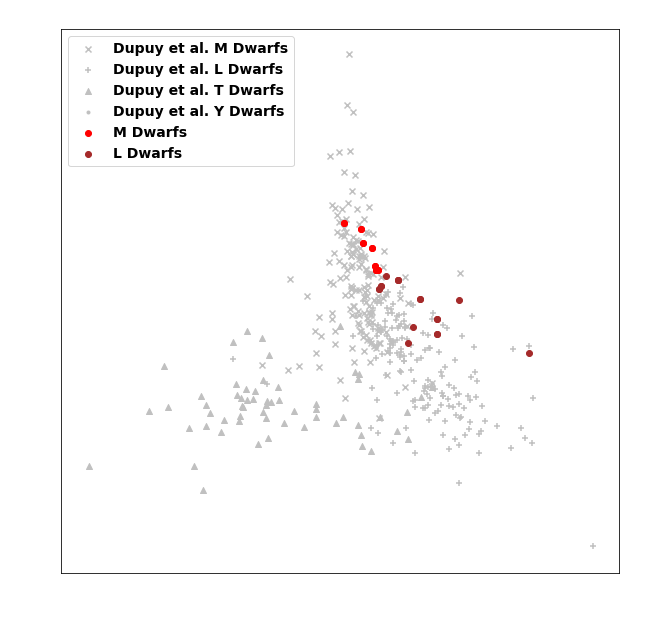

In [42]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.scatter(JminusK_mags_Mextradata,Jm_extra_data,color='#C0C0C0', label='Dupuy et al. M Dwarfs', marker='x')
ax1.scatter(JminusK_mags_Lextradata,Jl_extra_data,color='#C0C0C0', label='Dupuy et al. L Dwarfs', marker='+')
ax1.scatter(JminusK_mags_Textradata,Jt_extra_data,color='#C0C0C0', label='Dupuy et al. T Dwarfs', marker='^')
ax1.scatter(JminusY_mags_Yextradata,Jy_extra_data,color='#C0C0C0', label='Dupuy et al. Y Dwarfs', marker='.')
ax1.scatter(JminusK_mags_mdwarf,J_mags_mdwarf,color='red', label='M Dwarfs')
ax1.scatter(JminusK_mags_ldwarf,J_mags_ldwarf,color='brown', label='L Dwarfs')
#ax1.scatter(JminusK_mags_tdwarf,J_mags_tdwarf,color='orange', label='T Dwarfs')
ax1.yaxis.label.set_color('white')
ax1.xaxis.label.set_color('white')
ax1.title.set_color('white')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')

plt.title('Color Magnitude Diagram for Survey Sample from K2 data')
plt.xlabel('J-K Color')
plt.ylabel('J Magnitude')
plt.gca().invert_yaxis()
plt.legend(loc='upper left',prop={'size': 14})
plt.show

In [10]:
#path_to_csv_file = input('Please type path to csv file: \n')
spec_type_file=open('/Users/AllieMcCarthy/Desktop/K2dataSpecTypes.csv')
csv_spec_type_file=csv.reader(spec_type_file)
header=next(csv_spec_type_file)

In [11]:
spec_types=[]
for row in csv_spec_type_file:
  try:
     spec_type = int(row[5])
     
     spec_types.append(spec_type)
  except:
     pass
     print ('i had a problem')

spec_types.sort()
print(spec_types)

[17, 17, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 24, 25, 27, 27, 30]


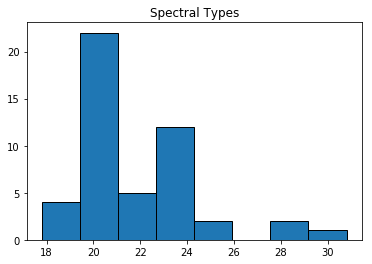

In [12]:
from matplotlib import pyplot as plt 
import numpy as np  
   
plt.hist(spec_types, edgecolor='black', bins='auto', align='right')
plt.title("Spectral Types") 
#ind = np.arange(17.5,31.5,1)
#plt.xticks(ind, ['M7', 'M8', 'M9', 'L0', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'T0'])
plt.show()


Text(0.5,1,'Spectral Type Distribution in my K2 Data Sample')

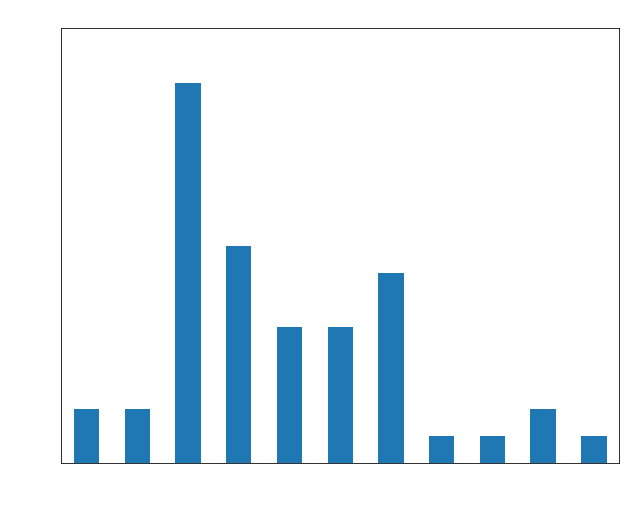

In [24]:
import pandas
from collections import Counter
#spec_types_original.sort()
#fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot(111)
letter_counts = Counter(spec_types_original)
df = pandas.DataFrame.from_dict(letter_counts, orient='index')
ax=df.plot(kind='bar', legend=False, figsize=(10,8))
ax.set_xlabel('Spectral Type')
ax.set_ylabel('Number')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.title.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_ylim(0,16)

ax.set_title('Spectral Type Distribution in my K2 Data Sample')


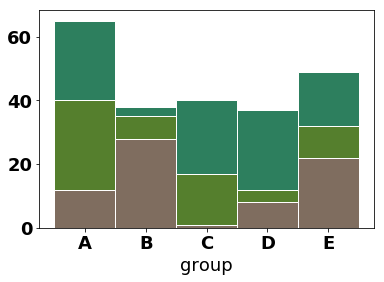

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# y-axis in bold
#rc('font', weight='bold')
 
# Values of each group
bars1 = [12, 28, 1, 8, 22]
bars2 = [28, 7, 16, 4, 10]
bars3 = [25, 3, 23, 25, 17]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3,4]
 
# Names of group and bar width
names = ['A','B','C','D','E']
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color='#7f6d5f', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("group")
 
# Show graphic
plt.show()

